<a href="https://colab.research.google.com/github/sajivjose174/Project/blob/main/Netflix_Analysis_(submission_final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import data

In [ ]:
!curl -o netflix.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3319k  100 3319k    0     0  2935k      0  0:00:01  0:00:01 --:--:-- 2938k


In [ ]:
df_netflix = pd.read_csv('netflix.csv')

In [ ]:
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# Basic Data Analysis

In [ ]:
#shape and dimension of the given data:

df_netflix.shape,df_netflix.ndim

((8807, 12), 2)

In [ ]:
#conversion to category type:

df_netflix['type']=df_netflix['type'].astype("category")

In [ ]:
#Percentage of null values in each column:#####
df_netflix.isnull().sum()*100/len(df_netflix)

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [ ]:
#Checking data types of all the attributes

df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   object  
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 765.7+ KB


In [ ]:
#statistical summary

df_netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Exploratory Data Analysis (EDA)

##Non Graphical Analysis

In [ ]:
# Unique Values
columns = df_netflix.columns
for column in columns:
  print(f"{column}: ", df_netflix[column].nunique())

show_id:  8807
type:  2
title:  8807
director:  4528
cast:  7692
country:  748
date_added:  1767
release_year:  74
rating:  17
duration:  220
listed_in:  514
description:  8775


In [ ]:
# Value counts
for column in columns:
  print(f"{column}: ", df_netflix[column].value_counts())

show_id:  show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: count, Length: 8807, dtype: int64
type:  type
Movie      6131
TV Show    2676
Name: count, dtype: int64
title:  title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64
director:  director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                   

In [ ]:
#Null Value Appraoch:
#Fill director rows:

df_netflix['director']=df_netflix['director'].fillna("Unknown")

In [ ]:
#Null Value Appraoch:
#Fill country columns using mode based on data grouped by director if available, else unknown:

def filval(x):
  x['mode']=x['country'].mode()[0] if not x['country'].mode().empty else "Unknown"
  return x

temp_s=df_netflix.groupby(['director'],group_keys=False).apply(filval)
temp_s['country'].fillna(temp_s['mode'],inplace=True)
#temp_s['director']=temp_s['director'].fillna("Uknown")
temp_s['cast']=temp_s['cast'].fillna("Unknown")

<ipython-input-6-22dab0bb8edd>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_s=df_netflix.groupby(['director'],group_keys=False).apply(filval)
<ipython-input-6-22dab0bb8edd>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_s

In [ ]:
temp_s['director'].unique()

array(['Kirsten Johnson', 'Unknown', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
data_fill1=temp_s
data_compare=data_fill1
data_compare['date_added']=data_compare['date_added'].str.strip()
data_compare['year']=pd.to_datetime(data_compare['date_added']).dt.year
data_compare['year'] = data_compare['year'].astype('Int64')
data_compare

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",United States,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,France,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",United States,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,United States,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States,2019
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",United States,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,2020


In [ ]:
#unpacking Country:
data_fill1['country'] = data_fill1['country'].apply(lambda x : x.split(','))
data_fill1=data_fill1.explode('country')
data_fill1['country']=data_fill1['country'].str.strip()

In [ ]:
#unpacking cast:
data_unpackcast=data_fill1
data_unpackcast['cast'] = data_unpackcast['cast'].apply(lambda x : x.split(','))
data_unpackcast=data_unpackcast.explode('cast')
data_unpackcast['cast']=data_unpackcast['cast'].str.strip()
data_unpackcast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,2021
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",United States,2021
1,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",United States,2021
1,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",United States,2021
1,s2,TV Show,Blood & Water,Unknown,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",United States,2021


In [ ]:
###unpacking genre######
data_unpackgen=data_fill1
data_unpackgen['listed_in']=data_fill1['listed_in'].apply(lambda x:x.split(','))
data_unpackgen=data_unpackgen.explode('listed_in')
data_unpackgen['listed_in']=data_unpackgen['listed_in'].str.strip()

In [ ]:
###### actor counts#######
actor_counts = data_unpackcast['cast'].value_counts().reset_index()
actor_counts=actor_counts[actor_counts['cast']!='Unknown']
actor_counts

,cast,count
1,Anupam Kher,46
2,David Attenborough,45
3,Vincent Tong,42
4,John Cleese,40
5,Tara Strong,39
...,...,...
36435,Odwa Gwanya,1
36436,Sello Maake Ka-Ncube,1
36437,Greteli Fincham,1
36438,Ryle De Morny,1


In [ ]:
######director counts####### Non-Graphical Analysis#############
director_count = temp_s['director'].value_counts().reset_index()
director_count=director_count[director_count['director']!='Unknown']
director_count

,director,count
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,14
...,...,...
4524,"Milla Harrison-Hansley, Alicky Sussman",1
4525,Drew Stone,1
4526,Benjamin Turner,1
4527,S. Shankar,1


### Table format of what genre and type is available in the bottom 5 countries:

In [ ]:
### what bottom countries has in genre#### table format
botc=data_unpackgen['country'].value_counts().index[-5:]
botc
#cond1=data_unpackgen['listed_in'].isin(top_g)
cond2=data_unpackgen['country'].isin(botc)
bot_data=data_unpackgen.loc[(cond2)]
#bot_data
print(bot_data[['country', 'listed_in']].value_counts().reset_index())

      country                 listed_in  count
0    Botswana             Documentaries      1
1  Kazakhstan  Children & Family Movies      1
2     Somalia                    Dramas      1
3       Sudan                    Dramas      1
4      Uganda             Documentaries      1


In [ ]:
#what type is available in bottom 5 countries#
print(bot_data[['country', 'type']].value_counts().reset_index())

      country   type  count
0    Botswana  Movie      1
1  Kazakhstan  Movie      1
2     Somalia  Movie      1
3       Sudan  Movie      1
4      Uganda  Movie      1


###Division of date into their respective types:



In [ ]:
### division of data sets to TV and Movies:#####################
df_mov=data_fill1.loc[data_fill1['type']=='Movie']
df_tv=data_fill1.loc[data_fill1['type']=='TV Show']
df_mov['year_only']=pd.to_datetime(df_mov['date_added']).dt.year
df_tv['year_only']=pd.to_datetime(df_tv['date_added']).dt.year
df_mov.head(3)
min=df_mov['year_only'].min()
max=df_mov['year_only'].max()
#print(min,max)

<ipython-input-16-6647620308d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['year_only']=pd.to_datetime(df_mov['date_added']).dt.year
<ipython-input-16-6647620308d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['year_only']=pd.to_datetime(df_tv['date_added']).dt.year


In [ ]:
bins1 = [2007, 2010, 2013, 2016, 2019, 2021]
labels1 = ['2008-2010', '2011-2013', '2014-2016', '2017-2019', '2020-2021']
df_mov['year_only']=pd.cut(df_mov['year_only'],bins=bins1,labels=labels1)

df_tv['year_only']=pd.cut(df_tv['year_only'],bins=bins1,labels=labels1)
df_mov.head(3)
df_tv.head(3)

<ipython-input-17-a7bf7f346f89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['year_only']=pd.cut(df_mov['year_only'],bins=bins1,labels=labels1)
<ipython-input-17-a7bf7f346f89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['year_only']=pd.cut(df_tv['year_only'],bins=bins1,labels=labels1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode,year,year_only
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",United States,2021,2020-2021
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",France,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,France,2021,2020-2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,[Unknown],United States,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",United States,2021,2020-2021


##Graphical Analysis:

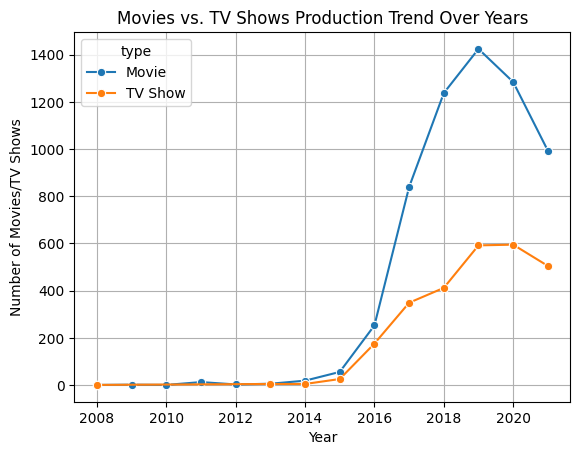

In [ ]:
#### Movie vs TV shows production over the years using date added on netflix #######

data_line=data_compare.groupby(['year','type']).size().reset_index(name='count')
sns.lineplot(x='year',y='count',hue='type',data=data_line,marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Movies/TV Shows")
plt.title("Movies vs. TV Shows Production Trend Over Years")
plt.grid(True)

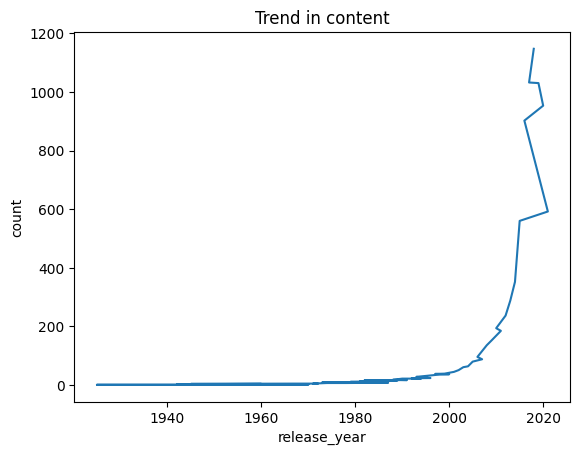

In [ ]:
# Trend in content (Release year)#
data_line1=data_compare.groupby(['year','type']).size().reset_index(name='count')
data_line1
df_netflix['release_year'].value_counts().plot() #(Both TV Shows and Movies)
plt.ylabel("count")
plt.title("Trend in content")
plt.show()

Text(0.5, 1.0, 'Movie vs. TV Show Production Count')

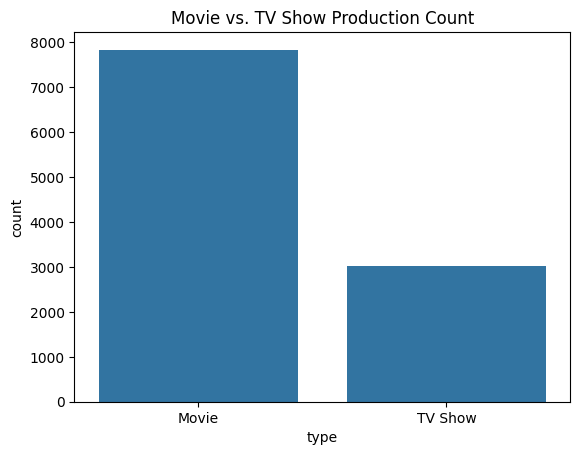

In [ ]:
#Plot on movie (Vs) TV-shows:

sns.countplot(x='type',data=data_fill1)
plt.title("Movie vs. TV Show Production Count")

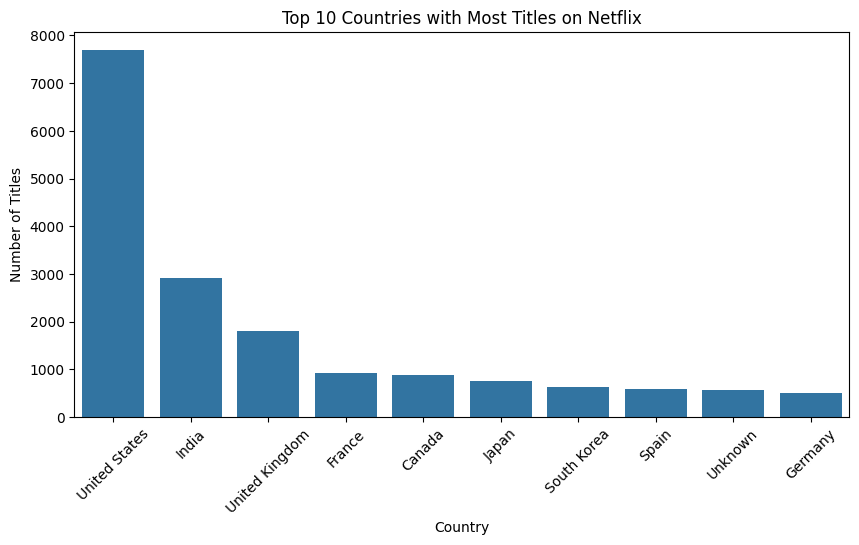

In [ ]:
###top countries wrt to genre
country_counts = data_unpackgen['country'].value_counts().head(10)  # Top 10 countries
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Titles on Netflix")
plt.ylabel("Number of Titles")
plt.xlabel("Country")
plt.show()

Text(0.5, 0, 'Country')

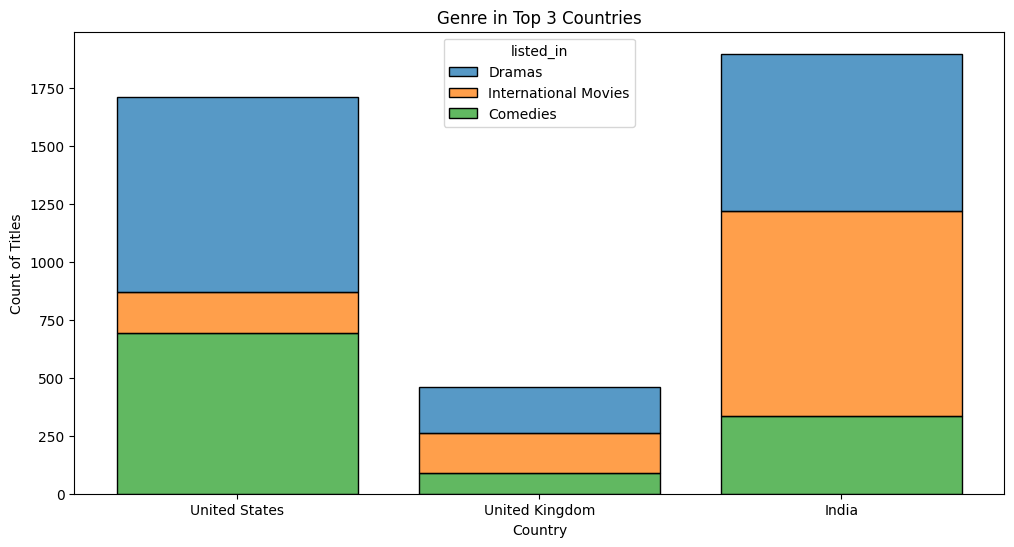

In [ ]:
#Top Genre in top 3 countries#

topc=data_unpackgen['country'].value_counts().index[:3]
top_g=data_unpackgen['listed_in'].value_counts().index[:3]

cond1=data_unpackgen['listed_in'].isin(top_g)
cond2=data_unpackgen['country'].isin(topc)

top_data=data_unpackgen.loc[(cond1)&(cond2)]
top_data

topc1=data_unpackgen['country'].value_counts().index[:10]
cond1=data_unpackgen['country'].isin(topc1)
top_data1=data_unpackgen.loc[(cond1)]


plt.figure(figsize=(12,6))
sns.histplot(data=top_data, x='country', hue='listed_in', multiple='stack', shrink=0.8)
plt.title("Genre in Top 3 Countries")
plt.ylabel("Count of Titles")
plt.xlabel("Country")

<ipython-input-26-678c0807d54e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_data_h['Day']=pd.to_datetime(top_data_h['date_added'],errors='coerce').dt.day_name()


Text(50.72222222222221, 0.5, 'Country')

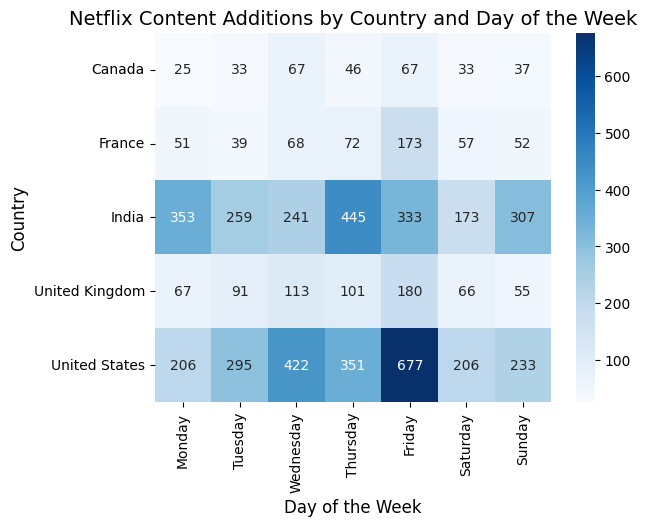

In [ ]:
#Content added by country and day of week# (Correaltion):

topc=data_unpackgen['country'].value_counts().index[:5]
top_g=data_unpackgen['listed_in'].value_counts().index[:5]
condh1=data_unpackgen['listed_in'].isin(top_g)
condh2=data_unpackgen['country'].isin(topc)
top_data_h=data_unpackgen.loc[(condh1)&(condh2)]

top_data_h['Day']=pd.to_datetime(top_data_h['date_added'],errors='coerce').dt.day_name()
top_data3=top_data_h.loc[:,['country','Day']]
#top_data3['count']=1
heatmap_data=top_data_h.pivot_table(index='country',columns='Day',aggfunc='size')
top_data3
#sns.heatmap(heatmap_data,cmap="Blues",annot=True)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(columns=day_order)


#heatmap_data=heatmap_data.T
sns.heatmap(heatmap_data,cmap="Blues",fmt='d',annot=True)
plt.title("Netflix Content Additions by Country and Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Country", fontsize=12)

In [ ]:
heatmap_data

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
country,,,,,,,
Canada,25,33,67,46,67,33,37
France,51,39,68,72,173,57,52
India,353,259,241,445,333,173,307
United Kingdom,67,91,113,101,180,66,55
United States,206,295,422,351,677,206,233


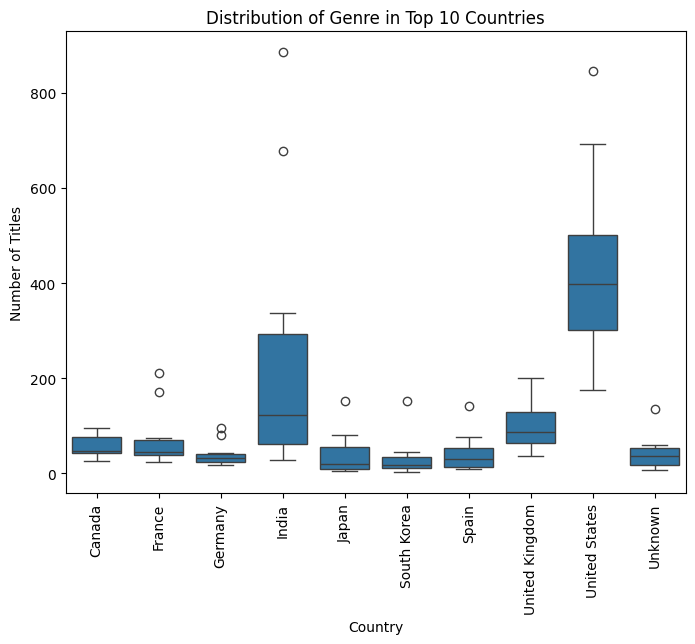

In [ ]:
#Comparing genre diversity within countries###

topc=data_unpackgen['country'].value_counts().index[:10]
top_g=data_unpackgen['listed_in'].value_counts().index[:10]
cond3=data_unpackgen['listed_in'].isin(top_g)
cond4=data_unpackgen['country'].isin(topc)
top_data_t=data_unpackgen.loc[(cond3)&(cond4)]



plt.figure(figsize=(8,6))
genre_counts = top_data_t.groupby(['country', 'listed_in']).size().reset_index(name='count')
sns.boxplot(data=genre_counts, x='country', y='count')
plt.title("Distribution of Genre in Top 10 Countries")
plt.xticks(rotation=90)
plt.ylabel("Number of Titles")
plt.xlabel("Country")
plt.show()

###Comparison between Movie and TVshows:

Text(0.5, 0, 'Years')

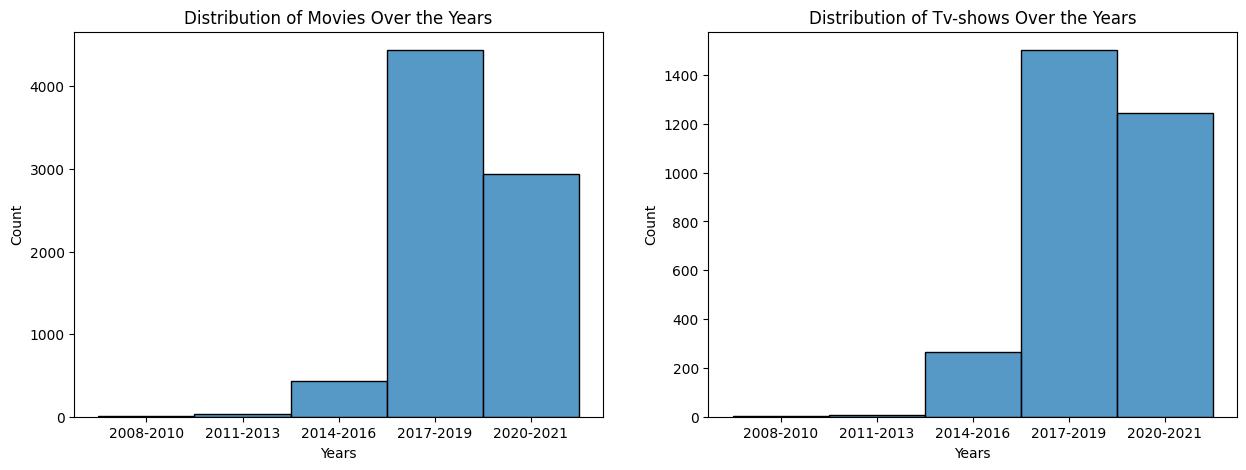

In [ ]:
#Distribution over the years####

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df_mov['year_only'])
plt.title('Distribution of Movies Over the Years')
plt.xlabel("Years")

plt.subplot(1,2,2)
sns.histplot(data=df_tv['year_only'])
plt.title('Distribution of Tv-shows Over the Years')
plt.xlabel("Years")

Text(0.5, 1.0, 'Top 3 TV shows-Producing Countries')

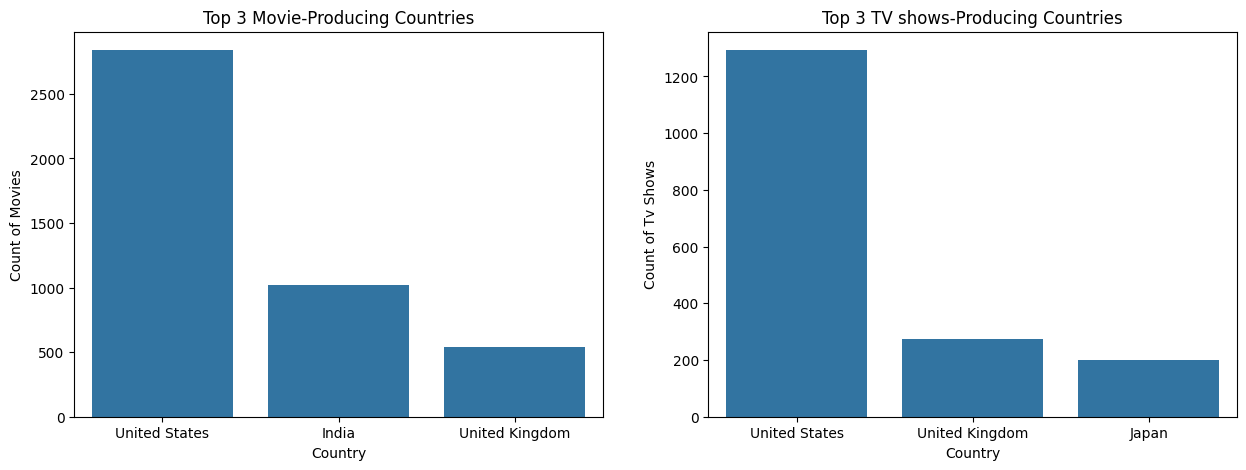

In [ ]:
#Top 3 movie producing countries#

top_country_mov=df_mov["country"].value_counts().sort_values(ascending=False).index[:3]
top_country_tv=df_tv["country"].value_counts().sort_values(ascending=False).index[:3]
#top_country_mov=df_mov["country"].value_counts().sort_values(ascending=False).index[:3]
#df_c=df_mov[df_mov['country'].isin (top_country_mov)]
#print(top_country_mov)

df_c=df_mov[df_mov['country'].isin (top_country_mov)]
df_t=df_tv[df_tv['country'].isin (top_country_tv)]




plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='country',data=df_c,order=df_c['country'].value_counts().index)
plt.xlabel("Country")
plt.ylabel('Count of Movies')
plt.title("Top 3 Movie-Producing Countries")

plt.subplot(1,2,2)
sns.countplot(x='country',data=df_t,order=df_t['country'].value_counts().index)
plt.xlabel("Country")
plt.ylabel('Count of Tv Shows')
plt.title("Top 3 TV shows-Producing Countries")

Text(0.5, 1.0, 'Popular TV-show Genres')

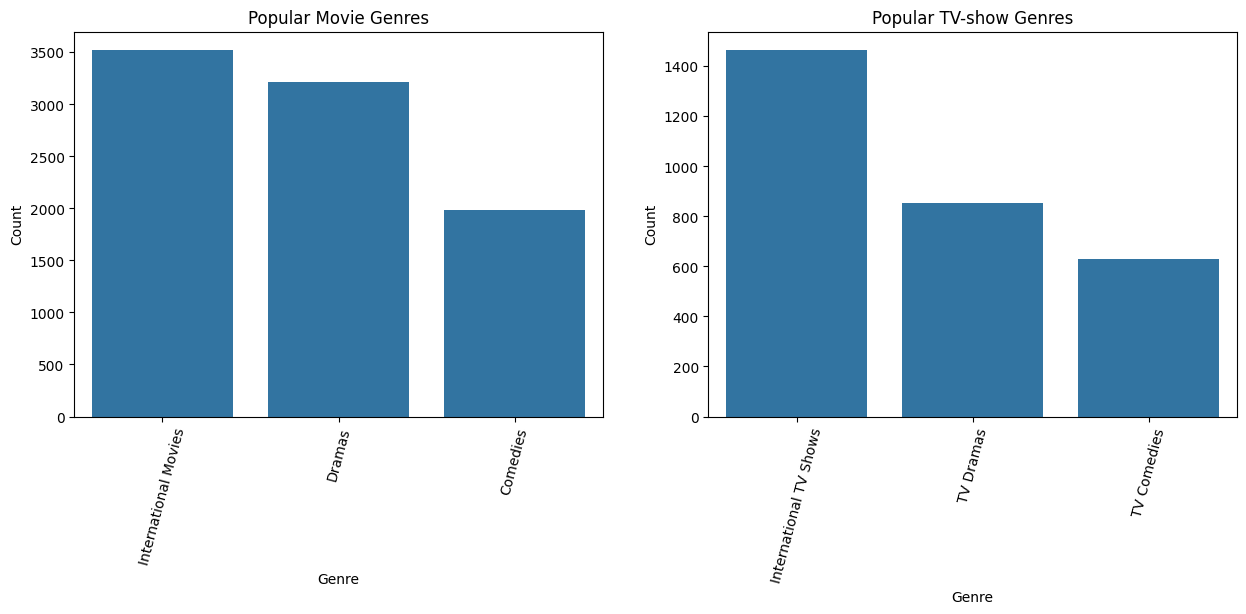

In [ ]:
####top 3 genre for movie vs top3 genre for tv shows####

df_mov_g=data_unpackgen.loc[data_unpackgen['type']=='Movie']
top_country_gen=df_mov_g['listed_in'].value_counts().sort_values(ascending=False).index[:3]
df_mov_g=df_mov_g[df_mov_g['listed_in'].isin (top_country_gen)]


df_mov_tv=data_unpackgen.loc[data_unpackgen['type']=='TV Show']
top_country_gen=df_mov_tv['listed_in'].value_counts().sort_values(ascending=False).index[:3]
df_mov_tv=df_mov_tv[df_mov_tv['listed_in'].isin (top_country_gen)]


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='listed_in',data=df_mov_g,order=df_mov_g['listed_in'].value_counts().index)
plt.xlabel("Genre")
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.title("Popular Movie Genres")

plt.subplot(1,2,2)
sns.countplot(x='listed_in',data=df_mov_tv,order=df_mov_tv['listed_in'].value_counts().index)
plt.xlabel("Genre")
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.title("Popular TV-show Genres")


<ipython-input-16-2cd4f22952c0>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_n['duration'].fillna(df_n['duration'].median(), inplace=True)


Text(0.5, 1.02, 'Movie Release Year vs. Netflix Addition Year by Duration Category')

<Figure size 1000x500 with 0 Axes>

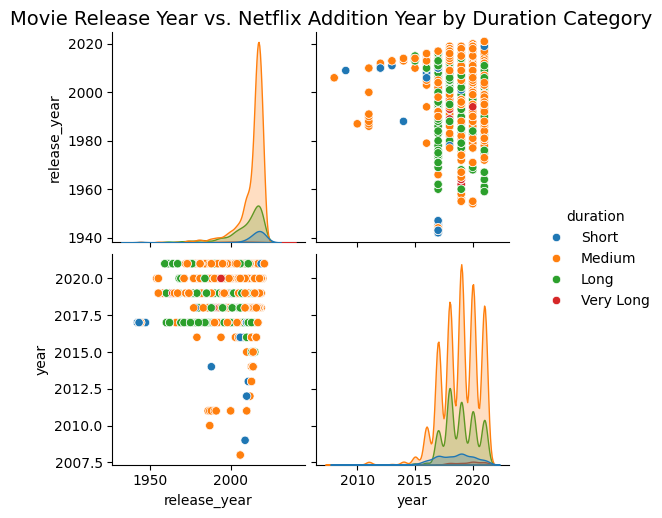

In [ ]:
#Comparison on Netflix added year and Released years##
# two seperate cells# (As cant fit both in one)

topc1=data_unpackgen['country'].value_counts().index[:10]
cond1=data_unpackgen['country'].isin(topc1)
top_data1=data_unpackgen.loc[(cond1)]

df_n=top_data1.loc[top_data1['type']=='Movie'].copy()
df_n['duration'] = df_n['duration'].astype(str)
df_n['duration'] = df_n['duration'].str.replace(' min', '')
df_n['duration'] = pd.to_numeric(df_n['duration'], errors='coerce')
df_n['duration'].fillna(df_n['duration'].median(), inplace=True)
df_n['duration'] = df_n['duration'].astype(int)
bins = [0, 60, 120, 180, float('inf')]
labels = ['Short', 'Medium', 'Long', 'Very Long']
df_n['duration']=pd.cut(df_n['duration'],bins=bins,labels=labels)


topc1=data_unpackgen['country'].value_counts().index[:10]
cond1=data_unpackgen['country'].isin(topc1)

top_data9=data_unpackgen.loc[(cond1)]
top_data9=top_data9.loc[top_data9['date_added'].notnull()]



df_tv=top_data9.loc[top_data9['type']=='TV Show'].copy()
df_tv['duration'] = df_tv['duration'].astype(str)
df_tv['duration'] = df_tv['duration'].str.strip()
df_tv['duration'] = df_tv['duration'].str.extract(r'(\d)')


df_tv['duration'] = df_tv['duration'].astype(int)
bins1 = [-1, 3, 5, df_tv['duration'].max()]
labels1 = ['Short', 'Medium', 'Long']
df_tv['duration']=pd.cut(df_tv['duration'],bins=bins1,labels=labels1)


####### pairplot is itws own figure,cant be used with subplots ######
plt.figure(figsize=(10,5))
#plt.subplot(1,2,1)
sns.pairplot(data=df_n,hue='duration')
plt.suptitle("Movie Release Year vs. Netflix Addition Year by Duration Category", fontsize=14, y=1.02)



<Figure size 1000x500 with 0 Axes>

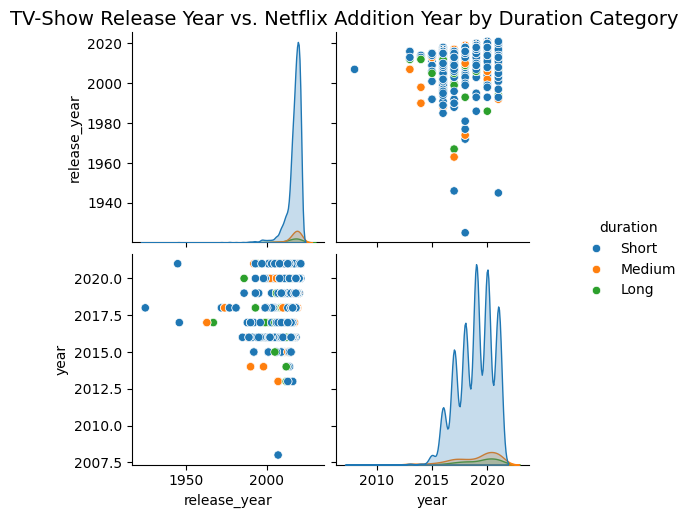

In [ ]:
#Comparison on Netflix added year and Released years##
plt.figure(figsize=(10,5))
#plt.subplot(1,2,2)
sns.pairplot(data=df_tv,hue='duration')
plt.suptitle("TV-Show Release Year vs. Netflix Addition Year by Duration Category", fontsize=14, y=1.02)
plt.show()

<ipython-input-41-ff2ef71a82ab>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_n1['duration'].fillna(df_n1['duration'].median(), inplace=True)


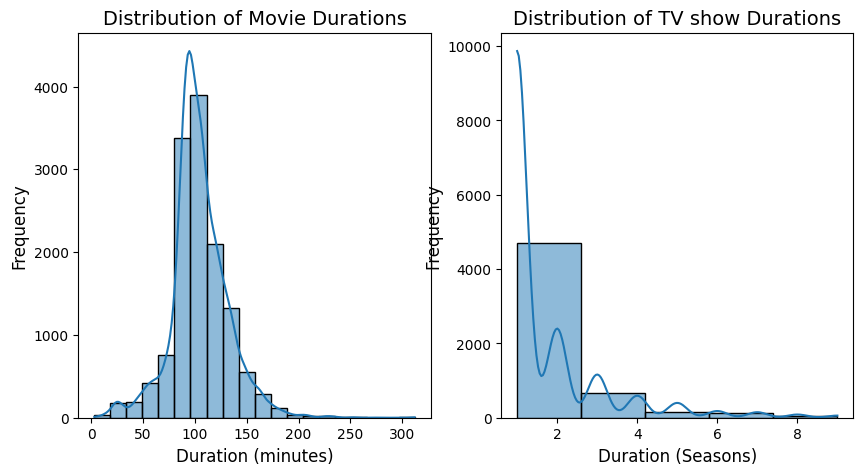

In [ ]:
###Spread of Movie Durations ###

topc2=data_unpackgen['country'].value_counts().index[:15]
cond1=data_unpackgen['country'].isin(topc2)
top_data2=data_unpackgen.loc[(cond1)]
df_n1=top_data2.loc[top_data2['type']=='Movie'].copy()

df_n1['duration'] = df_n1['duration'].astype(str)
df_n1['duration'] = df_n1['duration'].str.replace(' min', '')
df_n1['duration'] = pd.to_numeric(df_n1['duration'], errors='coerce')
df_n1['duration'].fillna(df_n1['duration'].median(), inplace=True)
df_n1['duration'] = df_n1['duration'].astype(int)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df_n1['duration'], bins=20, kde=True)
plt.title('Distribution of Movie Durations', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


###Spread of Tv show Durations ###

plt.subplot(1,2,2)
top_data9=data_unpackgen.loc[(cond1)]
top_data9=top_data9.loc[top_data9['date_added'].notnull()]
df_tv=top_data9.loc[top_data9['type']=='TV Show'].copy()
df_tv['duration'] = df_tv['duration'].astype(str)
df_tv['duration'] = df_tv['duration'].str.strip()
df_tv['duration'] = df_tv['duration'].str.extract(r'(\d)')

df_tv['duration'] = df_tv['duration'].astype(int)
sns.histplot(df_tv['duration'], bins=5, kde=True)
plt.title('Distribution of TV show Durations', fontsize=14)
plt.xlabel('Duration (Seasons)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()